# Visualizing distributions of data in Python



1. Create a histogram;
2. Probability Mass Function;
3. Cumulative Distribution Function;
4. Empirical Cumulative Distribution Function (ECDF);
5. Kernel Density Estimation

In [1]:
# Import packages

import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install empiricaldist
from empiricaldist import Pmf 
from empiricaldist import Cdf
import seaborn as sns

In [2]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('us_election_22.csv')

# Print the first few rows of the DataFrame
print(df.head())

   Unnamed: 0     county state  percentage16_Donald_Trump  \
0           0  Abbeville    SC                      0.629   
1           1     Acadia    LA                      0.773   
2           2   Accomack    VA                      0.545   
3           3        Ada    ID                      0.479   
4           4      Adair    IA                      0.653   

   percentage16_Hillary_Clinton  total_votes16  votes16_Donald_Trump  \
0                         0.346        10724.0                6742.0   
1                         0.206        27386.0               21159.0   
2                         0.428        15755.0                8582.0   
3                         0.387       195587.0               93748.0   
4                         0.300         3759.0                2456.0   

   votes16_Hillary_Clinton  percentage20_Donald_Trump  percentage20_Joe_Biden  \
0                   3712.0                      0.661                   0.330   
1                   5638.0            

In [3]:
# Convert to pandas df

df = pd.DataFrame(df)
df.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [4]:
# see column names

df.columns


Index(['Unnamed: 0', 'county', 'state', 'percentage16_Donald_Trump',
       'percentage16_Hillary_Clinton', 'total_votes16', 'votes16_Donald_Trump',
       'votes16_Hillary_Clinton', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'total_votes20', 'votes20_Donald_Trump',
       'votes20_Joe_Biden', 'lat', 'long', 'cases', 'deaths', 'TotalPop',
       'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [5]:
# remove 'unnamed' column

removed = df.pop('Unnamed: 0')
df.columns

Index(['county', 'state', 'percentage16_Donald_Trump',
       'percentage16_Hillary_Clinton', 'total_votes16', 'votes16_Donald_Trump',
       'votes16_Hillary_Clinton', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'total_votes20', 'votes20_Donald_Trump',
       'votes20_Joe_Biden', 'lat', 'long', 'cases', 'deaths', 'TotalPop',
       'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [6]:
# Examine dtypes

df.dtypes

county                           object
state                            object
percentage16_Donald_Trump       float64
percentage16_Hillary_Clinton    float64
total_votes16                   float64
votes16_Donald_Trump            float64
votes16_Hillary_Clinton         float64
percentage20_Donald_Trump       float64
percentage20_Joe_Biden          float64
total_votes20                   float64
votes20_Donald_Trump            float64
votes20_Joe_Biden               float64
lat                             float64
long                            float64
cases                           float64
deaths                          float64
TotalPop                        float64
Men                             float64
Women                           float64
Hispanic                        float64
White                           float64
Black                           float64
Native                          float64
Asian                           float64
Pacific                         float64


# Histogram

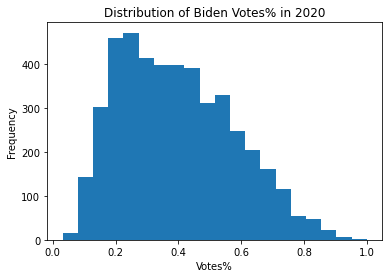

In [7]:
# Count no. of rows in df

num_rows = len(df)
num_rows

# Let's examine the distribution of votes% for Biden in 2020 in each country

# Set the number of bins for the histogram
bins = 20

# Create the histogram
plt.hist(df['percentage20_Joe_Biden'], bins)

# Add a title and axis labels
plt.title('Distribution of Biden Votes% in 2020')
plt.xlabel('Votes%')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

In [8]:
# Calculate the mean of Y target variable
median = df['percentage20_Joe_Biden'].median()
median

0.376

In [9]:
# Calculate the standard deviation of Y target variable

std = df['percentage20_Joe_Biden'].std()
std

0.18090918876923165

In [10]:
# Calculate the 25th, 50th, and 75th percentiles
percentiles = df['percentage20_Joe_Biden'].quantile([0.25, 0.50, 0.75])
percentiles

0.25    0.245
0.50    0.376
0.75    0.524
Name: percentage20_Joe_Biden, dtype: float64

In [11]:
# Calculate the 10th, 20th etc... percentiles

percentiles = df['percentage20_Joe_Biden'].quantile([i/100 for i in range(10, 100, 10)])
percentiles

0.1    0.1759
0.2    0.2220
0.3    0.2700
0.4    0.3210
0.5    0.3760
0.6    0.4290
0.7    0.4900
0.8    0.5590
0.9    0.6500
Name: percentage20_Joe_Biden, dtype: float64

# Probability Mass Function — PMF Plots

In [12]:
X = df['percentage20_Joe_Biden']

# Compute PMF
pmf_dist = Pmf.from_seq(X, normalize=False)
pmf_dist.sort_values(ascending=False)

0.419    17
0.237    17
0.394    16
0.191    15
0.210    15
         ..
0.706     1
0.693     1
0.687     1
0.682     1
1.000     1
Name: , Length: 759, dtype: int64

In [13]:
pmf_dist_norm = Pmf.from_seq(X, normalize=True)
pmf_dist_norm.sort_values(ascending=False)

0.419    0.003786
0.237    0.003786
0.394    0.003563
0.191    0.003341
0.210    0.003341
           ...   
0.706    0.000223
0.693    0.000223
0.687    0.000223
0.682    0.000223
1.000    0.000223
Name: , Length: 759, dtype: float64

In [14]:
# Get the frequency of 40% for Biden and compare to the frequency of 60%.
# As the former is nearer to the mean, we can reasonably expect the probability to be much higher compared to the latter.

pmf_dist_norm[0.4]

0.0028953229398663697

In [15]:
pmf_dist_norm[0.6]

0.0011135857461024498

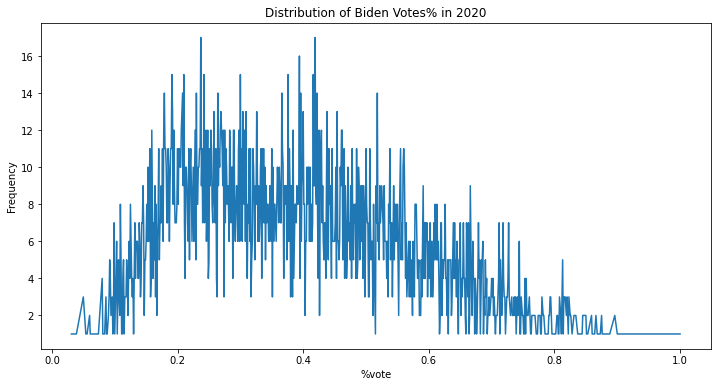

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

pmf_dist.plot()

ax.set(xlabel='%vote',
       ylabel='Frequency',
       title='Distribution of Biden Votes% in 2020');

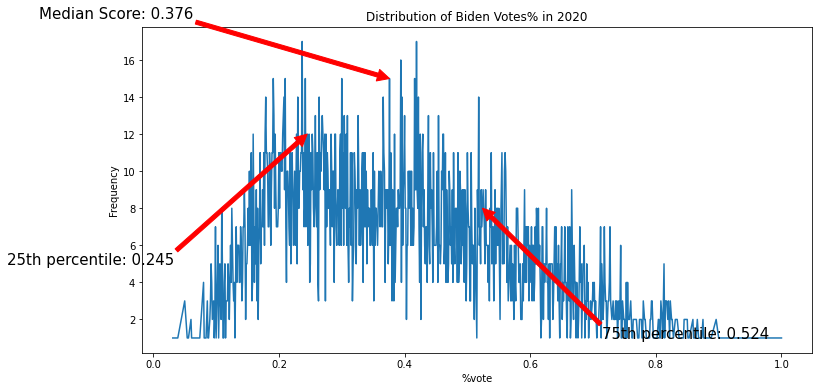

In [17]:
# Find median
median_score = X.median()

# Extract its prob
median_prob = pmf_dist[median_score]

# Find 25th percentile
percentile_25th = X.describe()['25%']

# Find 75th percentile
percentile_75th = X.describe()['75%']

# Extract its prob
percentile_prob_25 = pmf_dist[percentile_25th]

# Extract its prob
percentile_prob_75 = pmf_dist[percentile_75th]

# Recreate the plot with annotations
fig, ax = plt.subplots(figsize=(12,6))

pmf_dist.plot()

ax.set(xlabel='%vote',
       ylabel='Frequency',
       title='Distribution of Biden Votes% in 2020')
# Annotate the median score
ax.annotate(text=f'Median Score: {median_score}',
            xy=(median_score, median_prob),
            xycoords='data',
            fontsize=15,
            xytext=(-350, 60),
            textcoords='offset points', 
            arrowprops={'color': 'red'})

# Annotate the 25th percentile
ax.annotate(text=f'25th percentile: {percentile_25th}',
            xy=(percentile_25th, percentile_prob_25),
            xycoords='data',
            fontsize=15,
            xytext=(-300, -130),
            textcoords='offset points', 
            arrowprops={'color': 'red'});

# Annotate the 75th percentile
ax.annotate(text=f'75th percentile: {percentile_75th}',
            xy=(percentile_75th, percentile_prob_75),
            xycoords='data',
            fontsize=15,
            xytext=(120, -130),
            textcoords='offset points', 
            arrowprops={'color': 'red'});

A drawback of PMF is it cannot work with distributions with too many unique values. If we use the PMF plot, there is too much noise that we cannot derive any meaningful insights. And it would be too dangerous to use histograms since it is hard to choose the binning that best depicts the distribution. There is a lesser-known but very informative function for such distributions: Cumulative Distribution Function. Unlike PMFs, they can take any values (discrete, continuous, mixed) and show the trends in distribution. Plotting the cumulative frequencies allows us to smooth out the randomness and not get distracted by noise.

# Cumulative Distribution Function

In [18]:
X = df['percentage20_Joe_Biden']

# Create the CDF
cdf_vote = Cdf.from_seq(X)

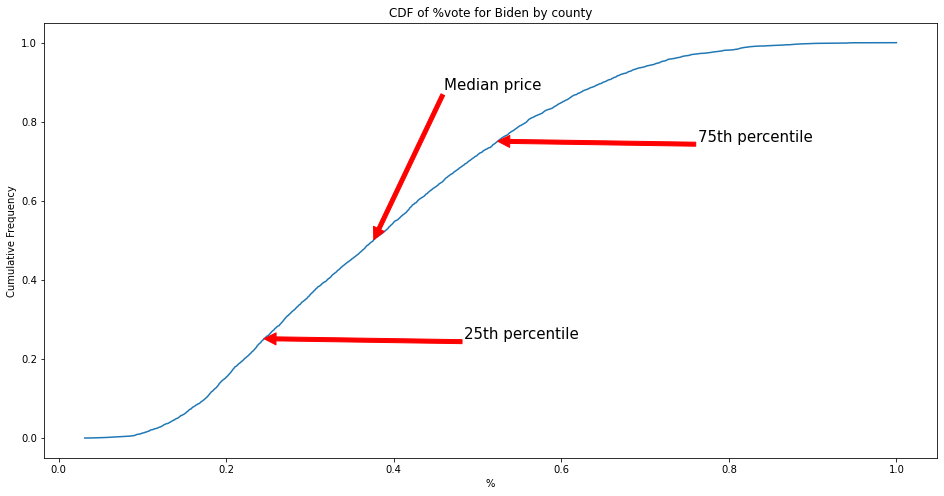

In [19]:
# Calculate the median score
median_score = X.median()

# Get the frequency for median
median_prob = cdf_vote[median_score]

# 25th percentile
percentile_25th = X.describe()['25%']

# 25th percentile
percentile_75th = X.describe()['75%']

# Probability of 25th percentile
percentile_prob_25 = cdf_vote[percentile_25th]

# Probability of 25th percentile
percentile_prob_75 = cdf_vote[percentile_75th]


fig, ax = plt.subplots(figsize=(16,8))

# PLot the CDF
ax.plot(cdf_vote)

# Annotate median price
ax.annotate(text='Median price',
            xy=(median_score, median_prob),
            xycoords='data',
            textcoords='offset points',
            xytext=(70, 150),
            fontsize=15,
            arrowprops={'color': 'red'})

# Annotate 25th percentile
ax.annotate(text='25th percentile',
            xy=(percentile_25th, percentile_prob_25),
            xycoords='data',
            textcoords='offset points',
            xytext=(200, 0),
            fontsize=15,
            arrowprops={'color': 'red'})

# Annotate 75th percentile
ax.annotate(text='75th percentile',
            xy=(percentile_75th, percentile_prob_75),
            xycoords='data',
            textcoords='offset points',
            xytext=(200, 0),
            fontsize=15,
            arrowprops={'color': 'red'})

ax.set(title='CDF of %vote for Biden by county',
       xlabel='%',
       ylabel='Cumulative Frequency')
plt.show();

Vote for Biden was over 50% in 25% of counties. Vote for Biden was over 38% (median) in 50% of counties. Vote for Biden was approx. 25% in 75% of counties.

One of the distinct advantages of CDFs can be seen when we plot different distributions on the same plot.

In [20]:
# Let's compare CDF of %Biden and % Trump in 2020.

X1 = df['percentage20_Joe_Biden']
X2 = df['percentage20_Donald_Trump']

# Create the CDFs
cdf_vote_jb = Cdf.from_seq(X1)
cdf_vote_dt = Cdf.from_seq(X2)


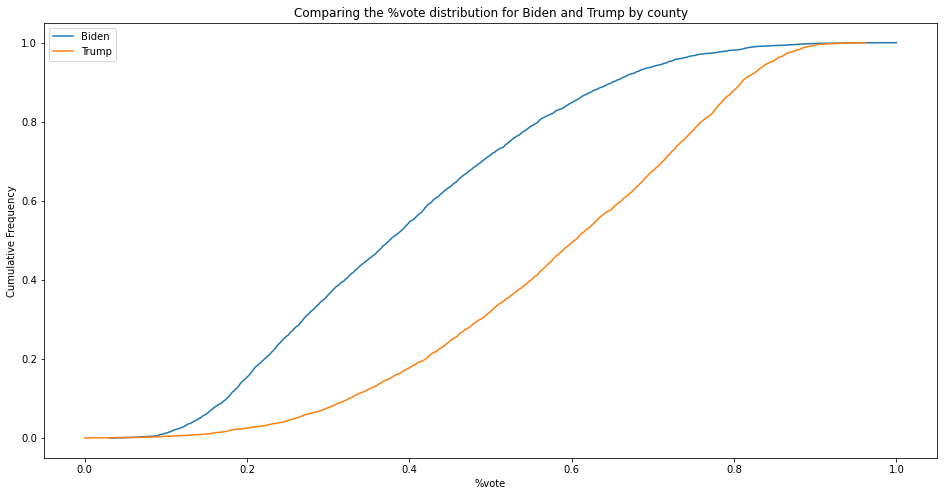

In [21]:
# Create plot

fig, ax = plt.subplots(figsize=(16,8))
# Plot the cdf for JB
ax.plot(cdf_vote_jb)
# Plot the cdf for DT
ax.plot(cdf_vote_dt)

ax.set(title='Comparing the %vote distribution for Biden and Trump by county',
       xlabel='%vote',
       ylabel='Cumulative Frequency')
plt.legend(['Biden', 'Trump'])
plt.show();

The results show that Trump 'won' in the county vote. This is not surprising. Indeed, according to Brookings Institute, Biden had won 509 counties and Trump 2,547 counties. However, Biden won the popular and electoral college votes which ultimately decided the outcome.

# Empirical Cumulative Distribution Function (ECDF)

An ECDF is a graphical representation of the distribution of a dataset. It is a function that maps from a value in the dataset to its percentile rank in the dataset.

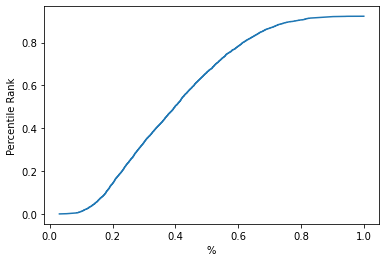

In [22]:
from statsmodels.distributions.empirical_distribution import ECDF
# Calculate the ECDF
ecdf = ECDF(df['percentage20_Joe_Biden'])

# Plot the ECDF
plt.plot(ecdf.x, ecdf.y)
plt.xlabel('%')
plt.ylabel('Percentile Rank')
plt.show()


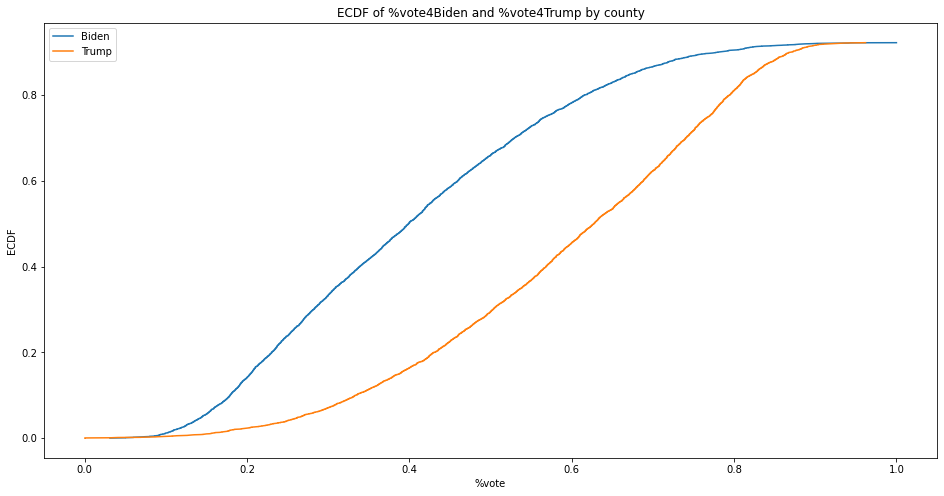

In [23]:
ecdf1 = ECDF(df['percentage20_Joe_Biden'])
ecdf2 = ECDF(df['percentage20_Donald_Trump'])

fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(ecdf1.x, ecdf1.y)
plt.plot(ecdf2.x, ecdf2.y)

ax.set(title='ECDF of %vote4Biden and %vote4Trump by county',
       xlabel='%vote',
       ylabel='ECDF')
plt.legend(['Biden', 'Trump'])
plt.show();

# Kernel Density Estimate (KDE) Plot, Interpretation

Another great plot to see the shape of your distribution is a KDE plot (Kernel Density Estimate). KDE plots use Probability Density Function. If there were too many unique data points in the discrete distributions, PMFs just introduced random noise to our plots rather than giving any insights. However, they were much better than histograms because they would not fall into pitfalls that came with binning bias, such as obscuring or over-representing the data.

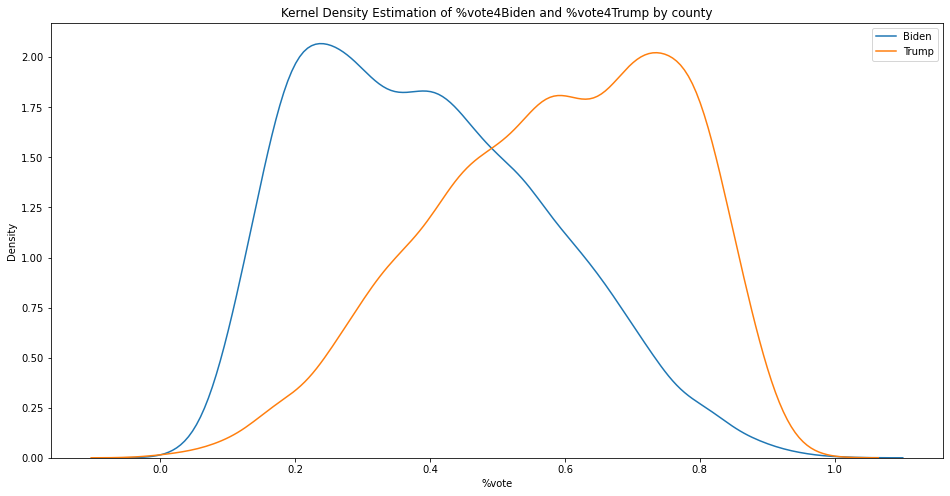

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.kdeplot(df['percentage20_Joe_Biden'])
sns.kdeplot(df['percentage20_Donald_Trump'])

ax.set(title='Kernel Density Estimation of %vote4Biden and %vote4Trump by county',
       xlabel='%vote',
       ylabel='Density')
plt.legend(['Biden', 'Trump'])
plt.show();

Useful sources: https://towardsdatascience.com/3-best-often-better-alternatives-to-histograms-61ddaec05305#:~:text=Kernel%20Density%20Estimate%20(KDE)%20Plot%2C%20Interpretation&text=However%2C%20they%20were%20much%20better,or%20over%2Drepresenting%20the%20data.